In [27]:
import numpy
import math
import random
import matplotlib.pyplot
import sklearn.discriminant_analysis

# create data from a multivariate normal distribution
mean1 = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
mean2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cov = [[3, 1, 1, 1, 0, 0, 0, 0, 0,  0],
       [1, 4, 0, 0, 0, 0, 0, 0, 0,  0],
       [1, 0, 4, 0, 0, 0, 0, 0, 0,  0],
       [1, 0, 0, 5, 0, 0, 0, 0, 0,  0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0,  0],
       [0, 0, 0, 0, 0, 10, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 11, 0, 0, 0],
       [0, 0, 4, 0, 0, 0,  0, 3, 0, 0],
       [0, 0, 0, 5, 0, 0,  0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0,  0, 0, 0, 6],]

# make sure the matrix is symmetric positive definite
cov = numpy.dot(cov, numpy.transpose(cov))

x1 = numpy.random.multivariate_normal(mean1,cov, 1000)
x2 = numpy.random.multivariate_normal(mean2,cov, 1000)

X = numpy.concatenate((x1,x2))

Xc = numpy.zeros(1000)
Xc = numpy.concatenate((Xc, numpy.ones(1000)))



In [24]:
# PCA
Xmc = X - numpy.mean(X)
D,E = numpy.linalg.eig(numpy.dot(Xmc.T,Xmc))

sortIndex = numpy.argsort(D)

ESorted = numpy.zeros((10,10))
index = 0
for i in range(0,10):
    ESorted[:,index] = E[:,sortIndex[i]]
    index = index + 1

meanSquareError = numpy.zeros(10,)
classificationError = numpy.zeros(10,)
ySorted = numpy.dot(X,ESorted)
print('this is the first original ysorted!')
print(ySorted.shape)
print(ySorted)
print('............................................................')
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
for numDims in range(5,11): 
    
    # reconstruction
    yReduced = ySorted[:,0:numDims]
    print('yred', yReduced.shape)
    print(yReduced)
    print('............................................................')
    EReduced = ESorted[:,0:numDims]
    print('Ered', EReduced.shape)
    print(EReduced)
    print('............................................................')
    XReconstructed = numpy.dot(yReduced, numpy.transpose(EReduced))
    print('xrecon',XReconstructed.shape)
    print(XReconstructed)
    print('............................................................')
    meanSquareError[10 - numDims] = sum(sum((XReconstructed - X)**2))/2000

    # classification
    #training
    lda.fit(yReduced,Xc)
    #testing
    prediction = lda.predict(yReduced)
    classificationError[10 - numDims] = sum(prediction != Xc) # sum(prediction != Xc)
    


this is the first original ysorted!
(2000, 10)
[[ -1.20513672  -2.85977761  -2.87471589 ...  -4.15219919  -8.1627283
   10.67398545]
 [  1.5221275   -1.04196066  -1.3947089  ...  -8.21523433   9.66334853
  -16.6813719 ]
 [  0.8158637    4.81309276   4.86405059 ...  -8.70749465  -2.27700489
    2.85226298]
 ...
 [  3.71101478  -1.62919345  -2.57992017 ...  -2.67604948   8.64766863
    5.41102492]
 [  0.63733063   2.59019959  -4.27301377 ...  -1.55370001  13.4301031
   21.57488383]
 [  1.67071516   0.44051612  -4.09051233 ...   1.94339726  10.49428056
   -7.61499507]]
............................................................
yred (2000, 5)
[[-1.20513672 -2.85977761 -2.87471589  8.88355885  3.53298038]
 [ 1.5221275  -1.04196066 -1.3947089   8.01548955 -4.92983132]
 [ 0.8158637   4.81309276  4.86405059 -2.77075338 -1.37899112]
 ...
 [ 3.71101478 -1.62919345 -2.57992017 -4.25681456 -1.71187143]
 [ 0.63733063  2.59019959 -4.27301377  4.42854476  2.40825695]
 [ 1.67071516  0.44051612 -4.09

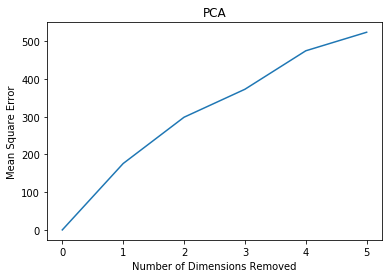

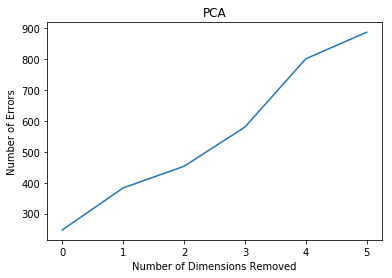

In [5]:
n = numpy.linspace(0,5,6)
matplotlib.pyplot.plot(n,meanSquareError[0:6])
matplotlib.pyplot.title("PCA")
matplotlib.pyplot.xlabel("Number of Dimensions Removed")
matplotlib.pyplot.ylabel("Mean Square Error")
matplotlib.pyplot.show()

matplotlib.pyplot.plot(n,classificationError[0:6])
matplotlib.pyplot.title("PCA")
matplotlib.pyplot.xlabel("Number of Dimensions Removed")
matplotlib.pyplot.ylabel("Number of Errors")
matplotlib.pyplot.show()



In [6]:
#use backward search to remove columns 
#so that the remaining provide the least error

minError = 1000000*numpy.ones(6,)
# classification with no columns removed
#training
lda.fit(ySorted,Xc)
#testing
prediction = lda.predict(ySorted)
minError[0] = sum(prediction != Xc)



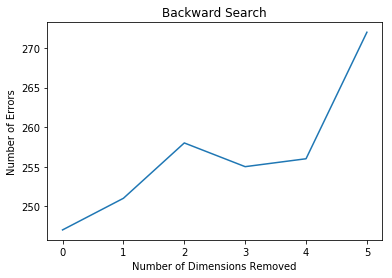

done


In [7]:
#find the column to remove that provides the lowest error
minErrorColumn = 0
ySelected = ySorted
numCols = 10
for iteration in range(1,6):
    for column in range(numCols):
        yReduced = numpy.delete(ySelected,column,1)
        # classification
        #training
        lda.fit(yReduced,Xc)
        #testing
        prediction = lda.predict(yReduced)
        classificationError = sum(prediction != Xc)
        if classificationError < minError[iteration]:
            minError[iteration] = classificationError
            minErrorColumn = column

    numCols = numCols - 1
    ySelected = numpy.delete(ySelected,minErrorColumn,1)


matplotlib.pyplot.plot(n,minError[0:6])
matplotlib.pyplot.title("Backward Search")
matplotlib.pyplot.xlabel("Number of Dimensions Removed")
matplotlib.pyplot.ylabel("Number of Errors")
matplotlib.pyplot.show()

print("done")

In [8]:
minError = 1000000*numpy.ones(6,)
minError

array([1000000., 1000000., 1000000., 1000000., 1000000., 1000000.])

In [9]:
ESorted = numpy.zeros((10,10))
ESorted

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
X

array([[-8.21651665, -2.25550194,  0.61340001, ...,  4.3897468 ,
        -1.29191988, -1.63193941],
       [-5.75476549, -6.28631453,  1.36959213, ...,  7.38522668,
        -1.02947023, -3.50080814],
       [ 1.33068482, -6.28429324, -1.78086578, ...,  5.80303271,
         7.43235225, 12.30978132],
       ...,
       [ 2.97758775,  3.2056472 ,  2.71391725, ...,  5.60796643,
         4.84546858,  9.11822836],
       [ 0.40367119,  2.66134303, -0.88936692, ...,  9.08762246,
         9.29523659,  5.66185616],
       [ 1.14607262,  1.33353194,  1.89673775, ...,  6.89116965,
         4.09813513, -5.29382191]])

In [11]:
ySorted = numpy.dot(X,ESorted)

In [12]:
ySorted

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
ySorted.shape

(2000, 10)

In [14]:
yReduced

array([[  8.88355885,   9.2040395 ,   3.77377021,  -4.15219919,
         -8.1627283 ],
       [  8.01548955,   7.11438495,   0.15391739,  -8.21523433,
          9.66334853],
       [ -2.77075338,  -2.93135796, -15.57829829,  -8.70749465,
         -2.27700489],
       ...,
       [ -4.25681456,   4.90201319,  -5.91384696,  -2.67604948,
          8.64766863],
       [  4.42854476,   0.77878369,  -3.46574745,  -1.55370001,
         13.4301031 ],
       [  6.23389833,   0.51174863,  -4.02412107,   1.94339726,
         10.49428056]])

In [17]:
EReduced.shape

(10, 10)

mean1 = [-3, 0, -1, -2, -4]
mean2 = [3, 1, 0, -2, -4]
cov = [[12, 0, 0, 0, 0],[0, 13, 0, 0, 0],[0, 0, 4, 0, 0],[0, 0, 0, 5, 0],[0, 0, 0, 0, 6]]

x1 = numpy.random.multivariate_normal(mean1,cov, 1000)
x2 = numpy.random.multivariate_normal(mean2, cov, 1000)

X = numpy.concatenate((x1,x2))

Xc = numpy.zeros(1000)
Xc = numpy.concatenate((Xc, numpy.ones(1000)))





In [28]:
# training set result without feature selection
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
#training
lda.fit(X,Xc)
#testing
prediction = lda.predict(X)
error = sum(abs(prediction - Xc))
print("total error with all features = ", error)


total error with all features =  226.0


In [52]:
#Select 3 features out of 5
bestFeature = 100*numpy.ones(6)
for iteration in range(3):
    if iteration == 0:
        Xselection = numpy.zeros((2000,1))
    else:
        Xselection = numpy.concatenate((Xselection, numpy.zeros((2000,1))), axis = 1)
        
    error  = 10000*numpy.ones(10)
    for feature in range(10):
        
        # have not used the feature before
        if(not(feature == bestFeature[0] or feature == bestFeature[1] 
            or feature == bestFeature[2])):
        
        #alternative method
        for i in range (0,feats_selected):
            if feature == bestFeature[i]:
                boolean = 1
            else:
                boolean = 0
        if(not(boolean == 1)):
            print(boolean)
            
                #add a feature to the existing features
                Xselection[:,iteration] = X[:,feature]

                #classify using Xselection
                lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
                lda.fit(Xselection,Xc)
                prediction = lda.predict(Xselection)
                error[feature] = sum(abs(prediction - Xc))

    bestFeature[iteration] = numpy.argmin(error)
    Xselection[:, iteration] = X[:,int(bestFeature[iteration])]

# training set result with feature extraction
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(Xselection,Xc)
prediction = lda.predict(Xselection)
error = sum(abs(prediction - Xc))
print("total error with selected features = ", error)

total error with selected features =  346.0


In [51]:
bestFeature.shape


(6,)